Профессия Data Science  
Блок 2. Подгрузка данных  
**SQL-4. Сложные объединения**

---

## **✍ Оглавление:**

 1. Знакомимся с данными
 2. UNION
 3. UNION и ограничение типов данных
 4. UNION ALL и промежуточные итоги
 5. UNION и дополнительные условия 
 6. UNION и ручная генерация
 7. EXCEPT
 8. INTERSECT
 9. Итоги. Закрепление знаний

---

## **1. Знакомимся с данными**

**Таблица city — это справочник городов**. Структура справочника представлена ниже.

НАЗВАНИЕ      ПОЛЯ - ТИП ДАННЫХ - ОПИСАНИЕ 

**city_id**	  (integer)	уникальный идентификатор города, первичный ключ  
**city_name** (text)	название города  
**state**	  (text)	штат, к которому относится город  
**population**(integer)	население города  
**area**	  (numeric)	площадь города

**Таблица customer — это справочник клиентов.** У компании, с данными которой мы работаем, только корпоративные клиенты, поэтому в таблице нет привычных данных о возрасте и поле. Справочник содержит следующие поля:

НАЗВАНИЕ      ПОЛЯ - ТИП ДАННЫХ - ОПИСАНИЕ

**cust_id**	(integer)	уникальный идентификатор клиента, первичный ключ  
**cust_name**	(text)	название клиента  
**annual_revenue**	(numeric)	ежегодная выручка  
**cust_type**	(text)	тип пользователя  
**address**	(text)	адрес  
**zip**	(integer)	почтовый индекс  
**phone**	(text)	телефон  
**city_id**	(integer)	идентификатор города, внешний ключ к таблице city

**Следующая таблица — driver — справочник водителей.** Перечень сведений, содержащихся в таблице, представлен ниже.

НАЗВАНИЕ      ПОЛЯ - ТИП ДАННЫХ - ОПИСАНИЕ

**driver_id**	(integer)	уникальный идентификатор водителя, первичный ключ  
**first_name**	(text)	имя водителя  
**last_name**	(text)	фамилия водителя  
**address**	(text)	адрес водителя  
**zip_code**	(integer)	почтовый индекс водителя  
**phone**	(text)	телефон водителя  
**city_id**	(integer)	идентификатор города водителя, внешний ключ к таблице city

**В таблице truck хранится информация о грузовиках, на которых осуществляются перевозки.** Данные о них представлены в следующем виде:

НАЗВАНИЕ      ПОЛЯ - ТИП ДАННЫХ - ОПИСАНИЕ

**truck_id**	(integer)	Уникальный идентификатор грузовика, первичный ключ  
**make**	(text)	Производитель грузовика  
**model_year**	(integer)	Дата выпуска грузовика

**Последняя таблица в датасете, shipment, — таблица с данными непосредственно о доставках.** Она описывает взаимодействие всех перечисленных сущностей, а потому содержит наибольшее количество ссылок на другие таблицы.

НАЗВАНИЕ      ПОЛЯ - ТИП ДАННЫХ - ОПИСАНИЕ

**ship_id**	(integer)	уникальный идентификатор доставки, первичный ключ  
**cust_id**	(integer)	идентификатор клиента, которому отправлена доставка, внешний ключ к таблице customer  
**weight**	(numeric)	вес посылки  
**truck_id**	(integer)	идентификатор грузовика, на котором отправлена доставка, внешний ключ к таблице truck  
**driver_id**	(integer)	идентификатор водителя, который осуществлял доставку, внешний ключ к таблице driver  
**city_id**	(integer)	идентификатор города в который совершена доставка, внешний ключ к таблице city  
**ship_date**	(date)	дата доставки

## **2. UNION**
**ПРИНЦИП И УСЛОВИЯ РАБОТЫ UNION**

оператор UNION ALL — присоединяет любой результат запроса к другому «снизу» при условии, что у них одинаковая структура, а именно:

- одинаковый тип данных;  
- одинаковое количество столбцов;  
- одинаковый порядок столбцов согласно типу данных.

**ВИДЫ UNION**

Оператор присоединения существует в двух вариантах:

**UNION** выводит только уникальные записи;  
**UNION ALL** присоединяет все строки последующих таблиц к предыдущим, без ограничений по уникальности.

**Важно!** UNION оставляет только уникальные значения, а потому требует дополнительных вычислительных мощностей и памяти (в данном случае можно провести аналогию с DISTINCT). Поэтому если вы уверены в отсутствии дубликатов в данных или они вам не важны, предпочтительнее использовать UNION ALL.

**СИНТАКСИС**

Запрос строится таким образом:

**SELECT  n columns  
FROM table_1  
UNION ALL  
SELECT n columns  
FROM  table_2  
...  
UNION ALL  
SELECT n columns  
FROM table_n**

Результатом выполнения такого запроса будут строки table_1, table_2, ..., table_n, соединённые одни под другими и выведенные в единой выдаче.

**Важно!** Названия итоговых колонок в выводе будут такие же, как в первом блоке SELECT, даже если они отличаются в других блоках подзапросов.

**SELECT c.city_id object_name, 'id города' object_type  
FROM sql.city c  
UNION ALL  
SELECT d.driver_id other_name, 'id водителя' other_type  
FROM sql.driver d  
UNION ALL  
SELECT s.ship_id, 'id доставки'  
FROM sql.shipment s  
UNION ALL  
SELECT c.cust_id, 'id клиента'  
FROM sql.customer c  
UNION ALL  
SELECT t.truck_id, 'id грузовика'  
FROM sql.truck t  
ORDER BY 1**

Другая особенность — в применении сортировки ORDER BY: она всегда будет относиться к итоговому результату всего запроса с UNION ALL.

В случаях, когда необходимо применить команду ORDER BY или LIMIT не к итоговому результату, а к каждой части запроса, можно обернуть подзапросы в скобки.

**(SELECT book_name object_name, 'книга' object_descritption   
FROM public.books  
ORDER BY 1  
LIMIT 1)  
UNION ALL    
(SELECT movie_title, 'фильм'   
FROM sql.kinopoisk  
ORDER BY 1  
LIMIT 1)**

**Задание 2.1 (External resource)**

SELECT c.city_name "название", 'city' "тип объекта"  
FROM sql.city c  
UNION  
SELECT c.state, 'state'  
FROM sql.city c  
UNION  
SELECT d.first_name, 'driver'  
FROM sql.driver d  
UNION  
SELECT t.make, 'truck'  
FROM sql.truck t  
ORDER BY 1,2

**Задание 2.2 (External resource)**

SELECT c.city_name object_name  
FROM sql.city c  
UNION ALL  
SELECT c.state  
FROM sql.city c  
ORDER BY 1

**Задание 2.3 (External resource)**

SELECT c.city_name object_name   
FROM sql.city c   
UNION  
SELECT c.state  
FROM sql.city c  
ORDER BY 1

## **3. UNION и ограничение типов данных**

Для типизации в Postgres составляется запрос по модели **column_name::column_type**.

Таким образом, чтобы перевести city_id в текст, нам потребуется написать city_id::text.

**Важно! Любой тип данных может быть приведён к текстовому формату — эту возможность целесообразно использовать для соединения разнородных сущностей. Главное — помнить, что сортировка текста отличается от сортировки чисел и дат.**

**SELECT c.city_id::text  
/*выбираем столбец city_id, переводим city_id из числового в текстовый формат*/  
FROM sql.city c  
/*из схемы sql  и таблицы city, задаём таблице алиас с*/
UNION ALL /*оператор присоединения*/  
SELECT cc.city_name /*выбираем столбец city_name*/  
FROM sql.city cc /*из схемы sql и таблицы city, задаём таблице алиас сс*/**

**Задание 3.1 (External resource)**

SELECT d.zip_code::text contact, d.first_name first_name,  'zip' contact_type  
FROM sql.driver d  
UNION  
SELECT dd.phone contact, dd.first_name first_name, 'phone' contact_type  
FROM sql.driver dd  
ORDER BY 1,2

## **4. UNION ALL и промежуточные итоги**

**ВОЗМОЖНОСТИ UNION**

✍ Помимо соединения разнородных сущностей в единый справочник, UNION ALL часто используется для подведения промежуточных итогов и выведения результатов агрегатных функций.

Кроме агрегатных функций, в запросах с UNION могут использоваться функции группировки и выборки.

**SELECT c.city_name, c.population  
/*выбираем столбцы city_name, population*/  
FROM sql.city c /*из схемы sql и таблицы city, задаём таблице алиас с*/  
UNION ALL /*оператор присоединения*/  
SELECT 'total', SUM(c.population)  
/*сами задаём объект ‘total’, суммируем все значения столбца population*/  
FROM sql.city c /*из схемы sql и таблицы city, задаём таблице алиас с*/  
ORDER BY 2 DESC /*сортируем по второму столбцу в убывающем порядке (чтобы итоговая сумма была в начале)*/**

**Задание 4.1 (External resource)**

SELECT s.ship_date::text date_period, COUNT(*) cnt_shipment  
FROM sql.shipment s   
GROUP BY 1  
UNION ALL  
SELECT 'total_shipments', COUNT(*)  
FROM sql.shipment s  
ORDER BY 1 desc

**Функция COUNT(*) возвращает количество строк в указанной таблице с учетом повторяющихся строк. Она подсчитывает каждую строку отдельно. При этом учитываются и строки, содержащие значения NULL.**

## **5. UNION и дополнительные условия**

✍ UNION также может быть использован для разделения существующей выборки по критерию «выполнение определённого условия».

**SELECT d.first_name, d.last_name, 'телефон заполнен' phone_info  
/*выбираем столбцы first_name, last_name, сами выводим объект ‘телефон заполнен’*/  
FROM sql.driver d /*из схемы sql и таблицы driver, задаём алиас d*/  
WHERE d.phone IS NOT NULL /*условие, что телефон заполнен*/  
UNION /*оператор присоединения (уникальные значения)*/  
SELECT d.first_name, d.last_name, 'телефон не заполнен' phone_info  
/*выбираем столбцы first_name, last_name, сами выводим объект ‘телефон не заполнен’*/  
FROM sql.driver d /*из схемы sql и таблицы driver, задаём алиас d*/  
WHERE d.phone IS NULL /*условие, что телефон не заполнен*/**

**Задание 5.1 (External resource)**

SELECT   
     c.city_name AS city_name,  
     c.state AS state,  
    'доставка осуществлялась' AS shipping_status  
FROM sql.city c  
    LEFT JOIN sql.shipment s ON c.city_id=s.city_id  
WHERE s.city_id IS NOT NULL  
UNION  
SELECT   
     c.city_name AS city_name,  
     c.state AS state,  
    'доставка не осуществлялась' AS shipping_status  
FROM sql.city c  
    LEFT JOIN sql.shipment s ON c.city_id=s.city_id  
WHERE s.city_id IS NULL  
ORDER BY 1, 2

**Задание 5.2 (External resource)**

SELECT  
    c.city_name AS city_name,  
    COUNT(s.ship_id) shippings_fake  
FROM sql.city c  
    JOIN sql.shipment s ON c.city_id=s.city_id  
GROUP BY c.city_name  
HAVING COUNT(s.ship_id) > 10  
UNION  
SELECT  
    c.city_name AS city_name,  
    COUNT(s.ship_id)+5 shippings_fake  
FROM sql.city c  
    JOIN sql.shipment s ON c.city_id=s.city_id  
GROUP BY c.city_name  
HAVING COUNT(s.ship_id) <= 10  
ORDER BY shippings_fake desc, city_name asc

## **6. UNION и ручная генерация**

✍ UNION можно использовать для создания справочников прямо в коде запроса. К примеру, если мы хотим вручную ввести какие-то значения и произвести с ними некоторые манипуляции или дополнить существующую выдачу своими значениями.

Составим запрос, который позволит вывести первые три буквы алфавита и их порядковые номера.

**SELECT 'a' letter,'1' ordinal_position  
UNION   
SELECT 'b','2'  
UNION   
SELECT 'c','3'**

Существуют сложные алгоритмы сравнения текстовых значений, но главный смысл сводится к одному: сравнение производится на основе таблицы unicode и позиции элемента в ней с учётом определённых условий.

**Задание 6.1 (External resource)**

SELECT  1000000 result  
UNION ALL  
SELECT  541  
UNION ALL  
SELECT  -500  
UNION ALL  
SELECT  100  
ORDER BY 1 DESC   
LIMIT 1

**Задание 6.2 (External resource)**

SELECT  '1000000' mycol  
UNION ALL  
SELECT  '541'  
UNION ALL  
SELECT  '-500'  
UNION ALL  
SELECT  '100'  
ORDER BY 1 DESC   
LIMIT 1

**Задание 6.3 (External resource)**

SELECT  '+' result  
UNION ALL  
SELECT  '-'  
UNION ALL  
SELECT  '='  
UNION ALL  
SELECT  '/'  
ORDER BY 1 deSC

## **7. EXCEPT**

**ИСКЛЮЧАЕМ ПОВТОРЯЮЩИЕСЯ ДАННЫЕ**

Чтобы лучше понять данный тип присоединения, предлагаем ознакомиться с диаграммой Венна — математическим инструментом, представляющим возможные логические связи между соединёнными наборами данных.

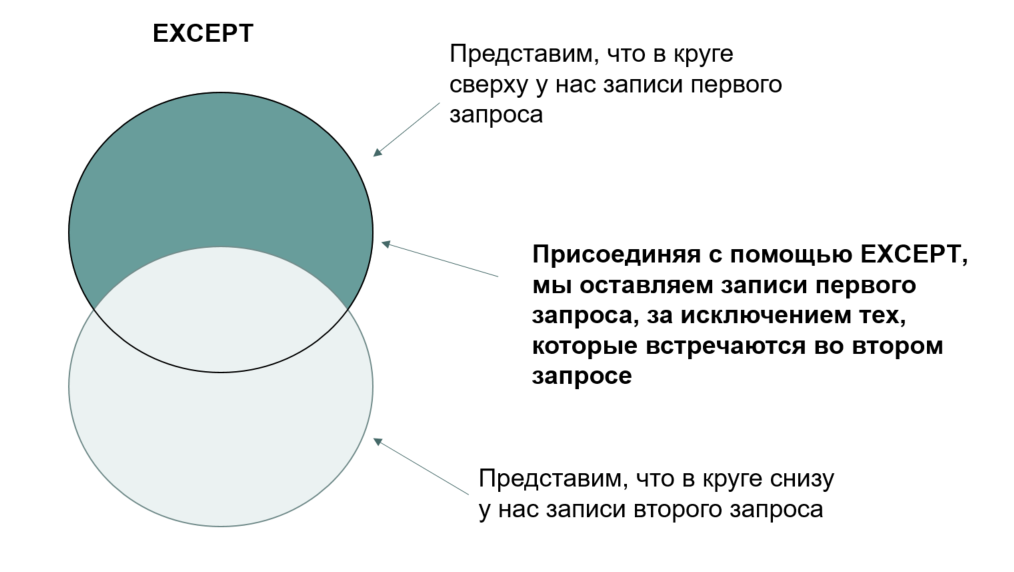

Синтаксические правила для оператора EXCEPT такие же, как и для UNION:

- одинаковый тип данных;  
- одинаковое количество столбцов;  
- одинаковый порядок столбцов согласно типу данных.

**Синтаксис выглядит следующим образом:**

**SELECT n columns  
FROM table_1  
EXCEPT  
SELECT n columns  
FROM table_2**
         
Мы уже знаем, как решить такую задачу с использованием LEFT JOIN. Вариант с EXCEPT будет полезен в тех случаях, когда у вас много столбцов и вам не хочется прописывать их равенство в условии для JOIN.

**Задание 7.1 (External resource)**

SELECT zip_code AS zip  
FROM sql.driver  
EXCEPT   
SELECT zip   
FROM sql.customer  
ORDER BY 1

## **8. INTERSECT**

**ВЫБИРАЕМ ОБЩИЕ ДАННЫЕ**

Чтобы лучше понять, как работает этот оператор, вновь обратимся к диаграмме Венна: INTERSECT оставляет из результатов первого запроса все строки, которые совпали с результатом выполнения второго запроса.

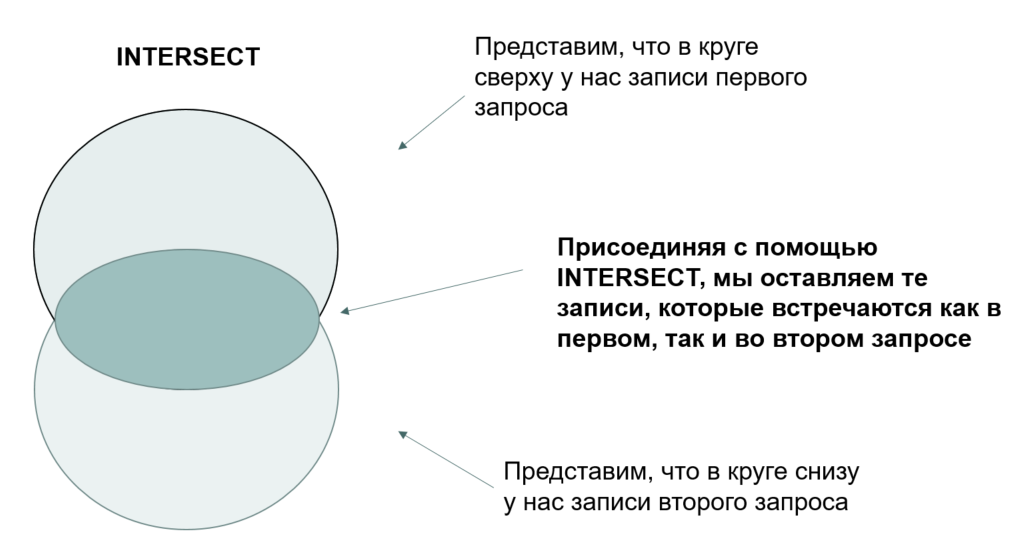

**Синтаксис запроса с оператором INTERSECT выглядит следующим образом:**

**SELECT n columns 
FROM table_1 
INTERSECT  
SELECT n columns  
FROM table_2**

**Как EXCEPT, так и INTERSECT убирают дубликаты, если они имеются.**

**Задание 8.1 (External resource)**

SELECT s.city_id  
FROM sql.shipment s   
INTERSECT  
SELECT c.city_id  
FROM sql.customer c  
INTERSECT  
SELECT d.city_id  
FROM sql.driver d

**Задание 8.2 (External resource)**

SELECT c.zip  
FROM sql.customer c  
INTERSECT  
SELECT d.zip_code  
FROM sql.driver d  
ORDER BY 1

## **9. Итоги. Закрепление знаний**

Запишем структуру запроса с учётом полученных знаний.

**SELECT N columns  
FROM table_1  
UNION / UNION ALL / EXCEPT / INTERSECT  
SELECT N columns  
FROM table_2**

**Задание 9.1 (External resource)**

(SELECT c.city_name, s.weight  
FROM sql.shipment s  
JOIN sql.city c ON s.city_id=c.city_id
ORDER BY 2 desc  
LIMIT 1)

UNION ALL

(SELECT c.city_name, s.weight  
FROM sql.shipment s  
JOIN sql.city c ON s.city_id=c.city_id  
ORDER BY 2  
LIMIT 1)

**Задание 9.2 (External resource)**

SELECT cust_id mutual_id  
FROM sql.customer  
INTERSECT  
SELECT ship_id  
FROM sql.shipment  
ORDER BY 1

**Задание 9.3 (External resource)**

SELECT cust_name object_name, 'КЛИЕНТ' object_description  
FROM sql.customer  
WHERE cust_type='manufacturer'  
UNION  
SELECT make, 'ГРУЗОВИК'  
FROM sql.truck  
ORDER BY 1